In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import MaxNLocator

from sqlalchemy import create_engine
from monitor import config

%matplotlib inline

In [2]:
import binascii

def target_int2bits(target):
    # comprehensive explanation here: bitcoin.stackexchange.com/a/2926/2116

    # get in base 256 as a hex string
    target_hex = int2hex(target)

    bits = "00" if (hex2int(target_hex[: 2]) > 127) else ""
    bits += target_hex # append
    bits = hex2bin(bits)
    length = int2bin(len(bits), 1)

    # the bits value could be zero (0x00) so make sure it is at least 3 bytes
    bits += hex2bin("0000")

    # the bits value could be bigger than 3 bytes, so cut it down to size
    bits = bits[: 3]

    return length + bits

def bits2target_int(bits_bytes):
    exp = bin2int(bits_bytes[: 1]) # exponent is the first byte
    mult = bin2int(bits_bytes[1:]) # multiplier is all but the first byte
    return mult * (2 ** (8 * (exp - 3)))

def int2hex(intval):
    hex_str = hex(intval)[2:]
    if hex_str[-1] == "L":
        hex_str = hex_str[: -1]
    if len(hex_str) % 2:
        hex_str = "0" + hex_str
    return hex_str

def hex2int(hex_str):
    return int(hex_str, 16)

def hex2bin(hex_str):
    return binascii.a2b_hex(hex_str)

def int2bin(val, pad_length = False):
    hexval = int2hex(val)
    if pad_length: # specified in bytes
        hexval = hexval.zfill(2 * pad_length)
    return hex2bin(hexval)

def bin2hex(binary):
    # convert raw binary data to a hex string. also accepts ascii chars (0 - 255)
    return binascii.b2a_hex(binary)

# def bin2int(bits):
#     return hex2int(bits)
def bin2int(binary):
    return hex2int(bin2hex(binary))

In [3]:
def bits2target(bits):
    exponent = (bits >> 24)
    coeficient = (float)(bits & 0xffffff)
    return coeficient * (2 ** (8 * (exponent - 3)))

def bits2target2(bits):
    shift = bits >> 24
    value = bits & 0x007fffff
    value <<= 8 * (shift - 3)
    return value

In [4]:
print(bits2target2(int("1e0fffff", 16)))
print(bits2target(int("1e0fffff", 16)))

110427836236357352041769395878404723568785424659630784333489133269811200
1.1042783623635735e+71


In [5]:
engine = create_engine(config.DB_CONFIG)
with engine.connect() as conn, conn.begin():
    av_pow_query = """
    SELECT pow.height, pow.time, pow.bits
    FROM (
        SELECT * FROM blockchain
        WHERE flags ~ 'proof-of-work'
    ) pow
    """
    pow_data = pd.read_sql_query(av_pow_query, conn)

In [6]:
pow_data

,height,time,bits
0,0,2017-02-05 21:26:29,1e0fffff
1,1,2017-03-08 02:30:23,1e0fffff
2,2,2017-03-08 02:31:05,1e0fffff
3,3,2017-03-08 02:31:09,1e0f543a
4,4,2017-03-08 02:31:10,1e0e5f7d
5,5,2017-03-08 02:31:13,1e0d7414
6,6,2017-03-08 02:31:14,1e0c9b6f
7,7,2017-03-08 02:31:16,1e0bccf2
8,8,2017-03-08 02:31:20,1e0b0d4b
9,9,2017-03-08 02:31:23,1e0a5cd7


In [7]:
pow_data["bits"] = pow_data.apply(lambda x: int(x[2], 16), axis=1)
pow_data["target"] = pow_data.apply(lambda x: bits2target2(x[2]), axis=1)

In [8]:
pow_data

,height,time,bits,target
0,0,2017-02-05 21:26:29,504365055,1104278362363573520417693958784047235687854246...
1,1,2017-03-08 02:30:23,504365055,1104278362363573520417693958784047235687854246...
2,2,2017-03-08 02:31:05,504365055,1104278362363573520417693958784047235687854246...
3,3,2017-03-08 02:31:09,504321082,1057969388348158868711018464470706836484266506...
4,4,2017-03-08 02:31:10,504258429,9919880782490577345291718825860568005235091621...
5,5,2017-03-08 02:31:13,504198164,9285216256750017459656715832024928144865270329...
6,6,2017-03-08 02:31:14,504142703,8701143755927032446511392658688523560181446240...
7,7,2017-03-08 02:31:16,504089842,8144452450937872301907528172549873287900534876...
8,8,2017-03-08 02:31:20,504040779,7627758754324430176811532953325481045814339870...
9,9,2017-03-08 02:31:23,503995607,7152042070399223653059697638672804968943426945...


In [17]:
ax = pow_data.plot(
    y="target",
    figsize=(15, 10),
    label="PoW bits"
)
# ax.set_ylim(1e13,1e26)

# plt.axhline(
#     y=int("1e0fffff", 16),
#     xmin=0,
#     xmax=1,
#     color="black",
# );

TypeError: Empty 'DataFrame': no numeric data to plot

In [10]:
def diff(bits):
    shift = (bits >> 24) & 0xff
    diff = 0x0000ffff / (float)(bits & 0x00ffffff)
    while shift < 29:
        diff *= 256.0
        shift += 1

    while shift > 29:
        diff /= 256.0
        shift -= 1
    
    return diff

def diff2(bits):
    return 256**(29 - (bits >> 24))*(0xffff / ((float)(bits & 0xffffff)))

pow_data["difficulty"] = pow_data.apply(lambda x: diff2(x[2]), axis=1)

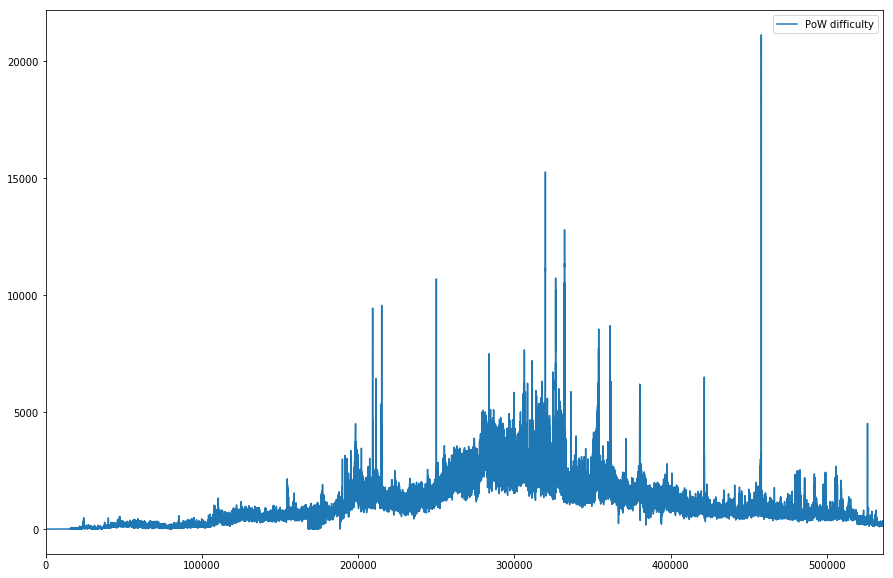

In [11]:
pow_data.plot(
    y="difficulty",
    figsize=(15, 10),
    label="PoW difficulty"
);

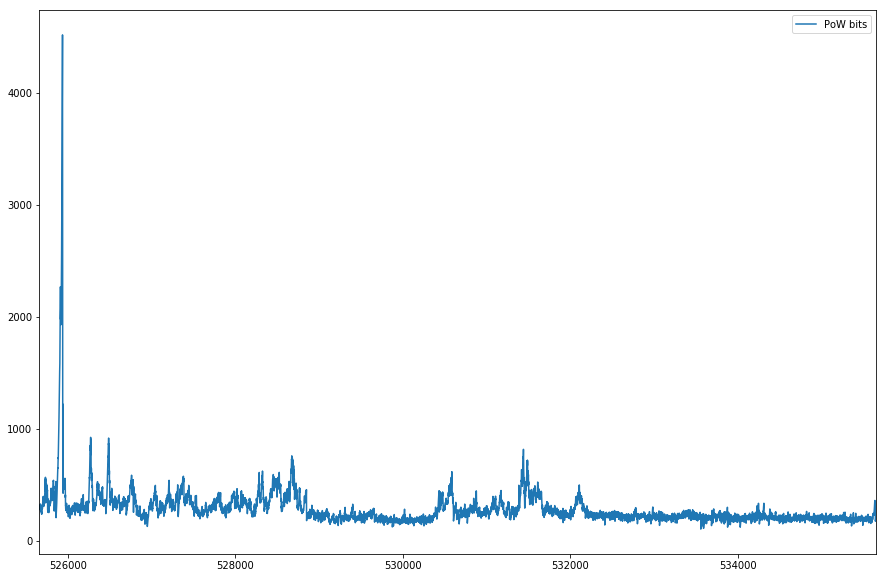

In [16]:
pow_data[-10000:].plot(
    y="difficulty",
    figsize=(15, 10),
    label="PoW bits"
);